In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image

<IPython.core.display.Image object>


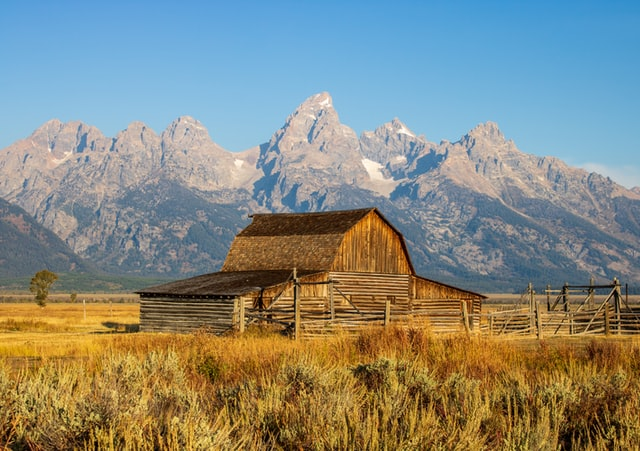

In [17]:
from IPython import display
im=display.Image("./sample_img.jpg")
print(im)
display.Image("./sample_img.jpg")

In [22]:
image_array = img.imread("./sample_img.jpg")
print(image_array.shape)

(451, 640, 3)


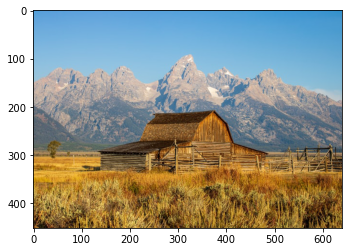

In [24]:
plt.imshow(image_array)

In [27]:
(h,w,c) = image_array.shape
img2D = image_array.reshape(h*w,c)
print(img2D)
print(img2D.shape)

[[ 82 158 216]
 [ 82 158 216]
 [ 82 158 216]
 ...
 [209 169  74]
 [131  92  23]
 [115  77  32]]
(288640, 3)


In [28]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=7) # we shall retain only 7 colors
cluster_labels = kmeans_model.fit_predict(img2D)

In [29]:
print(cluster_labels)

[0 0 0 ... 5 1 1]


In [30]:
from collections import Counter
labels_count = Counter(cluster_labels)
print(labels_count)

Counter({1: 47088, 2: 47052, 3: 45798, 0: 41091, 5: 40548, 6: 38675, 4: 28388})


In [31]:
print(kmeans_model.cluster_centers_)

[[ 92.98508189 165.55569346 216.94599791]
 [143.75145932 100.34142769  38.21442975]
 [103.26212086 117.20577295 129.08689183]
 [130.48563256 186.06616009 221.4930128 ]
 [ 77.29299608  48.31940946  15.82311783]
 [197.14213135 149.39489467  65.64624535]
 [185.54235754 174.70255309 168.425205  ]]


In [32]:
rgb_cols = kmeans_model.cluster_centers_.round(0).astype(int)

print(rgb_cols)

[[ 93 166 217]
 [144 100  38]
 [103 117 129]
 [130 186 221]
 [ 77  48  16]
 [197 149  66]
 [186 175 168]]


In [33]:
img_quant = np.reshape(rgb_cols[cluster_labels],(h,w,c))

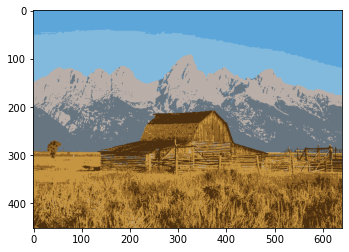

In [34]:
plt.imshow(img_quant)

Text(0.5, 1.0, 'Color Quantized Image')

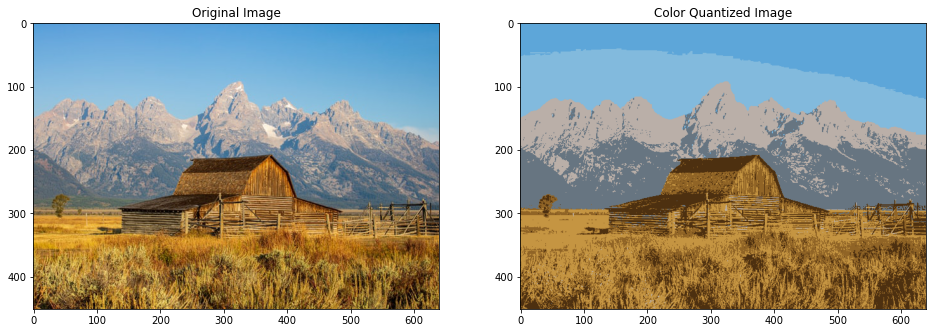

In [36]:
fig, ax = plt.subplots(1,2, figsize=(16,12))
ax[0].imshow(image_array)
ax[0].set_title('Original Image')
ax[1].imshow(img_quant)
ax[1].set_title('Color Quantized Image')